In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

# Get the data
data = pd.read_csv('auto-mpg.csv')
print(data.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [4]:
# Clean data
#converting all columns to numeric
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors ='coerce')
#replacing missing values in horsepower with its median
horse_med = data['horsepower'].median()
data['horsepower'] = data['horsepower'].fillna(horse_med)

Text(0, 0.5, 'MPG')

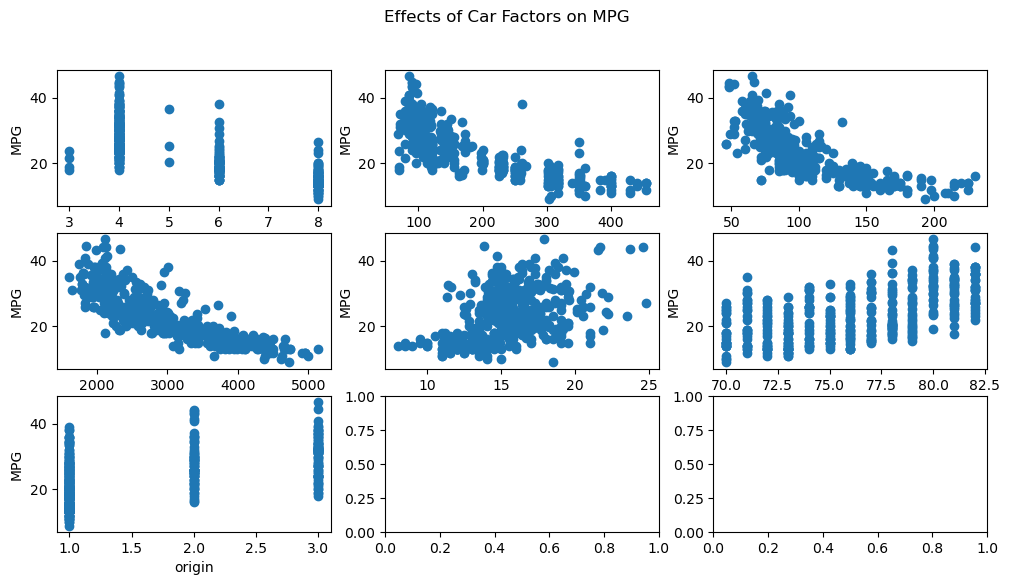

In [7]:
# Look at the data!  Create plots of Sales vs. each variable
fig, ax = plt.subplots(3, 3, figsize=(12,6))
fig.suptitle("Effects of Car Factors on MPG")
ax[0][0].plot(data['cylinders'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][0].set_xlabel('# cylinders')
ax[0][0].set_ylabel('MPG')

ax[0][1].plot(data['displacement'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][1].set_xlabel('displacement')
ax[0][1].set_ylabel('MPG')

ax[0][2].plot(data['horsepower'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][2].set_xlabel('horsepower')
ax[0][2].set_ylabel('MPG')

ax[1][0].plot(data['weight'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][0].set_xlabel('weight')
ax[1][0].set_ylabel('MPG')

ax[1][1].plot(data['acceleration'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][1].set_xlabel('acceleration')
ax[1][1].set_ylabel('MPG')

ax[1][2].plot(data['model year'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][2].set_xlabel('model year')
ax[1][2].set_ylabel('MPG')

ax[2][0].plot(data['origin'], data['mpg'], 'o', label = "Data")           # scatter plot showing actual data
ax[2][0].set_xlabel('origin')
ax[2][0].set_ylabel('MPG')

In [8]:
# create normalized data columns
data['cylinders_normalized'] = (data['cylinders'] - data['cylinders'].mean()) / data['cylinders'].std()
data['displacement_normalized'] = (data['displacement'] - data['displacement'].mean()) / data['displacement'].std()
data['horsepower_normalized'] = (data['horsepower'] - data['horsepower'].mean()) / data['horsepower'].std()
data['weight_normalized'] = (data['weight'] - data['weight'].mean()) / data['weight'].std()
data['model_year_normalized'] = (data['model year'] - data['model year'].mean()) / data['model year'].std()
data['origin_normalized'] = (data['origin'] - data['origin'].mean()) / data['origin'].std()
data['acceleration_normalized'] = (data['acceleration'] - data['acceleration'].mean()) / data['acceleration'].std()


In [9]:
# Fit a linear regression model - MPG = a0 + a1*cylinders + a2*displacement + a3*horsepower + a4*weight + a5*model year + a6*origin + a7*acceleration
model = smf.ols('mpg ~ cylinders_normalized + displacement_normalized + horsepower_normalized + weight_normalized + model_year_normalized + origin_normalized + acceleration_normalized', data=data)
model = model.fit()

# View model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          2.15e-141
Time:                        14:31:14   Log-Likelihood:                -1040.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2128.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [10]:
# Predict values
mpg_pred = model.predict()
data['mpg_predicted'] = mpg_pred

# get residuals
data['residuals'] = data['mpg'] - data['mpg_predicted']

Standard deviation of residuals: 3.3073092094541714


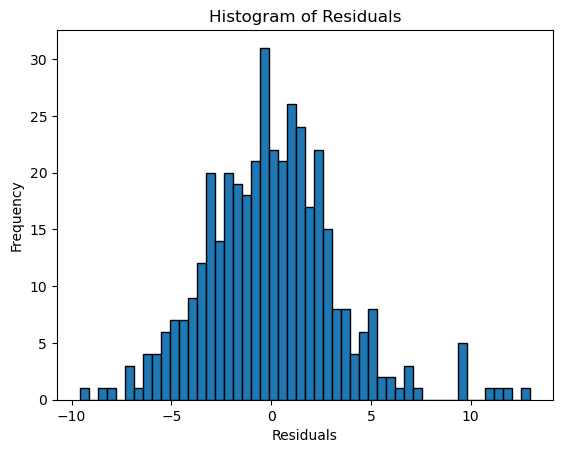

In [22]:
# Create a histogram
data['residuals'].plot.hist(bins=50, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

print("Standard deviation of residuals:", data['residuals'].std())

## Significant Linear Terms Model

Displacement, weight, model year, and origin are statistically significant with p values less than 0.05.  The other variables are not statistically significant. Fit a linear regression model with only significant variables.

In [32]:
# Fit a linear regression model - MPG = a0 + a1*weight + a3*model year + a4*origin
model_sig = smf.ols('mpg ~ displacement_normalized + weight_normalized + model_year_normalized + origin_normalized', data=data)
model_sig = model_sig.fit()

# View model summary
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     442.2
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          5.29e-144
Time:                        15:36:59   Log-Likelihood:                -1043.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     393   BIC:                             2117.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Standard deviation of residuals: 3.3326606747649774


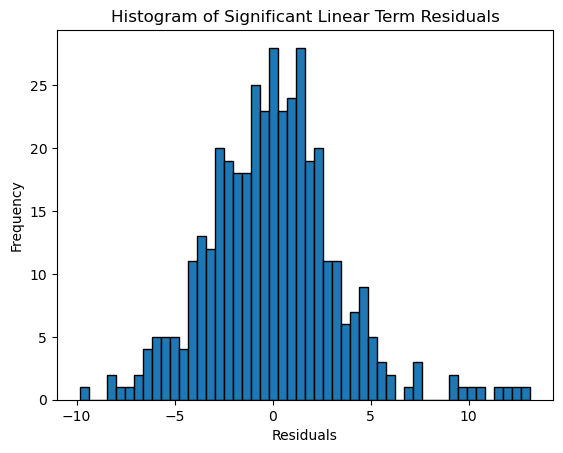

In [33]:
# Predict values
mpg_sig_pred = model_sig.predict()
data['mpg_sig_predicted'] = mpg_sig_pred

# get residuals
data['sig_residuals'] = data['mpg'] - data['mpg_sig_predicted']
# Create a histogram
data['sig_residuals'].plot.hist(bins=50, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Significant Linear Term Residuals')

print("Standard deviation of residuals:", data['sig_residuals'].std())

## Linear and Interaction Terms Model

Fit a linear regression model with all variables and interaction terms.

In [34]:
# Fit a linear regression model - MPG = a0 + a1*cylinders + a2*displacement + a3*horsepower + a4*weight + a5*model year + a6*origin + a7*acceleration + a8*cylinders*displacement + a9*cylinders*horsepower + a10*cylinders*weight + a11*cylinders*model year + a12*cylinders*origin + a13*cylinders*acceleration + a14*displacement*horsepower + a15*displacement*weight + a16*displacement*model year + a17*displacement*origin + a18*displacement*acceleration + a19*horsepower*weight + a20*horsepower*model year + a21*horsepower*origin + a22*horsepower*acceleration + a23*weight*model year + a24*weight*origin + a25*weight*acceleration + a26*model year*origin + a27*model year*acceleration + a28*origin*acceleration
model_interaction = smf.ols('mpg ~ cylinders_normalized + displacement_normalized + horsepower_normalized + weight_normalized + model_year_normalized + origin_normalized + acceleration_normalized + cylinders_normalized*displacement_normalized + cylinders_normalized*horsepower_normalized + cylinders_normalized*weight_normalized + cylinders_normalized*model_year_normalized + cylinders_normalized*origin_normalized + cylinders_normalized*acceleration_normalized + displacement_normalized*horsepower_normalized + displacement_normalized*weight_normalized + displacement_normalized*model_year_normalized + displacement_normalized*origin_normalized + displacement_normalized*acceleration_normalized + horsepower_normalized*weight_normalized + horsepower_normalized*model_year_normalized + horsepower_normalized*origin_normalized + horsepower_normalized*acceleration_normalized + weight_normalized*model_year_normalized + weight_normalized*origin_normalized + weight_normalized*acceleration_normalized + model_year_normalized*origin_normalized + model_year_normalized*acceleration_normalized + origin_normalized*acceleration_normalized', data=data)
model_interaction = model_interaction.fit()

# View model summary
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     105.6
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.13e-157
Time:                        15:37:08   Log-Likelihood:                -945.09
No. Observations:                 398   AIC:                             1948.
Df Residuals:                     369   BIC:                             2064.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Standard deviation of residuals: 2.6036618808754732


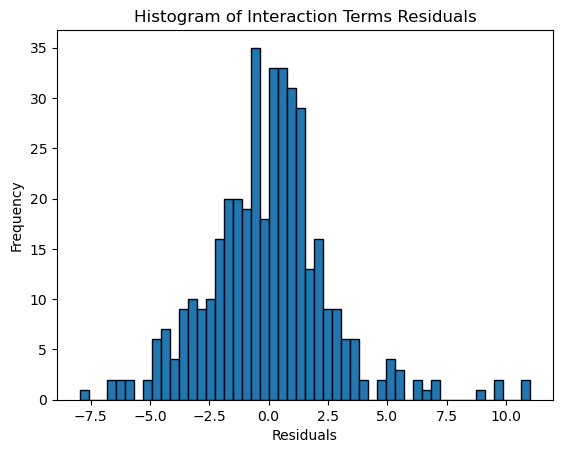

In [36]:
# Predict values
mpg_interaction_pred = model_interaction.predict()
data['mpg_interaction_predicted'] = mpg_interaction_pred

# get residuals
data['interaction_residuals'] = data['mpg'] - data['mpg_interaction_predicted']
# Create a histogram
data['interaction_residuals'].plot.hist(bins=50, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Interaction Terms Residuals')

print("Standard deviation of residuals:", data['interaction_residuals'].std())

The interaction terms displacement*weight, displacement*model_year, model_year*origin, model_year*acceleration, and origin*acceleration are statistically significant with p values less than 0.05.  The other interaction terms are not statistically significant.

The standard deviation of the residuals is smaller than the other models at 2.60, meaning this constitutes a better model.

# Significant Linear and Interaction Terms Model

In [37]:
# Fit a linear regression model - MPG = a0 + a1*weight + a2*horsepower + a3*model year + a4*origin + a5*displacement*weight + a6*displacement*model year + a7*model year*origin + a8*model year*acceleration + a9*origin*acceleration
model_sig_interaction = smf.ols('mpg ~ weight_normalized + horsepower_normalized + model_year_normalized + origin_normalized + displacement_normalized*weight_normalized + displacement_normalized*model_year_normalized + model_year_normalized*origin_normalized + model_year_normalized*acceleration_normalized + origin_normalized*acceleration_normalized', data=data)

model_sig_interaction = model_sig_interaction.fit()

# View model summary
print(model_sig_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     253.0
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          7.68e-169
Time:                        15:44:20   Log-Likelihood:                -963.66
No. Observations:                 398   AIC:                             1951.
Df Residuals:                     386   BIC:                             1999.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Standard deviation of residuals: 2.727996062847016


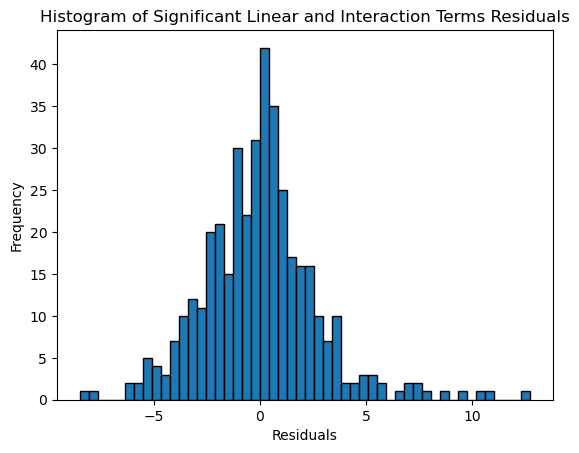

In [38]:
# Predict values
mpg_sig_interaction_pred = model_sig_interaction.predict()
data['mpg_sig_interaction_predicted'] = mpg_sig_interaction_pred
# get residuals
data['sig_interaction_residuals'] = data['mpg'] - data['mpg_sig_interaction_predicted']
# Create a histogram
data['sig_interaction_residuals'].plot.hist(bins=50, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Significant Linear and Interaction Terms Residuals')

print("Standard deviation of residuals:", data['sig_interaction_residuals'].std())

This model is even better with a standard deviation of residuals of 2.73.